In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [2]:
PATH_TO_RPKM_DATA = "./data/CCLE_RNAseq_genes_rpkm_20180929.gct"
PATH_TO_ANTICANCER_DRUG_DATA = "./data/CCLE_NP24.2009_Drug_data_2015.02.24.csv"

In [3]:
# first two columns are irrelavent
RPKMData = pd.read_csv(PATH_TO_RPKM_DATA, sep='\t', skiprows=2)
#print(RPKMData)

drugData = pd.read_csv(PATH_TO_ANTICANCER_DRUG_DATA, delimiter=',')
#print(drugData)

In [4]:
# partion data into drugs that focus 
columns = ['CCLE Cell Line Name', 'Primary Cell Line Name', 'Compound', 'Target', 'Doses (uM)', 'Activity Data (median)', 'Activity SD', 'Num Data', 'FitType',
           'EC50 (uM)', 'IC50 (uM)', 'Amax', 'ActArea']

AEW541 = pd.DataFrame(columns = columns)
Nilotinib = pd.DataFrame(columns = columns)
AAG17 = pd.DataFrame(columns = columns)
PHA665752 = pd.DataFrame(columns = columns)
Lapatinib = pd.DataFrame(columns = columns)
Nutlin3 = pd.DataFrame(columns = columns)
AZD0530 = pd.DataFrame(columns = columns)
PF2341066 = pd.DataFrame(columns = columns)
L685458 = pd.DataFrame(columns = columns)
ZD6474 = pd.DataFrame(columns = columns)
Panobinostat = pd.DataFrame(columns = columns)
Sorafenib = pd.DataFrame(columns = columns)
Irinotecan = pd.DataFrame(columns = columns)
Topotecan = pd.DataFrame(columns = columns)
LBW242 = pd.DataFrame(columns = columns)
PD0325901 = pd.DataFrame(columns = columns)
PD0332991 = pd.DataFrame(columns = columns)
Paclitaxel = pd.DataFrame(columns = columns)
AZD6244 = pd.DataFrame(columns = columns)
PLX4720 = pd.DataFrame(columns = columns)
RAF265 = pd.DataFrame(columns = columns)
TAE684 = pd.DataFrame(columns = columns)
TKI258 = pd.DataFrame(columns = columns)
Erlotinib = pd.DataFrame(columns = columns)

for i in range(0, 11670):
    x = drugData['Compound'][i]
    if x == "AEW541":
         AEW541.loc[drugData['CCLE Cell Line Name'][i]] = drugData.iloc[i]
    if x == "Nilotinib":
         Nilotinib.loc[drugData['CCLE Cell Line Name'][i]] = drugData.iloc[i]
    if x == "17-AAG":
         AAG17.loc[drugData['CCLE Cell Line Name'][i]] = drugData.iloc[i]
    if x == "PHA-665752":
         PHA665752.loc[drugData['CCLE Cell Line Name'][i]] = drugData.iloc[i]
    if x == "Lapatinib":
         Lapatinib.loc[drugData['CCLE Cell Line Name'][i]] = drugData.iloc[i]
    if x == "Nutlin-3":
         Nutlin3.loc[drugData['CCLE Cell Line Name'][i]] = drugData.iloc[i]
    if x == "AZD0530":
         AZD0530.loc[drugData['CCLE Cell Line Name'][i]] = drugData.iloc[i]
    if x == "PF2341066":
         PF2341066.loc[drugData['CCLE Cell Line Name'][i]] = drugData.iloc[i]
    if x == "L-685458":
         L685458.loc[drugData['CCLE Cell Line Name'][i]] = drugData.iloc[i]
    if x == "ZD-6474":
         ZD6474.loc[drugData['CCLE Cell Line Name'][i]] = drugData.iloc[i]
    if x == "Panobinostat":
         Panobinostat.loc[drugData['CCLE Cell Line Name'][i]] = drugData.iloc[i]
    if x == "Sorafenib":
         Sorafenib.loc[drugData['CCLE Cell Line Name'][i]] = drugData.iloc[i]
    if x == "Irinotecan":
         Irinotecan.loc[drugData['CCLE Cell Line Name'][i]] = drugData.iloc[i]
    if x == "Topotecan":
         Topotecan.loc[drugData['CCLE Cell Line Name'][i]] = drugData.iloc[i]
    if x == "LBW242":
         LBW242.loc[drugData['CCLE Cell Line Name'][i]] = drugData.iloc[i]
    if x == "PD-0325901":
         PD0325901.loc[drugData['CCLE Cell Line Name'][i]] = drugData.iloc[i]
    if x == "PD-0332991":
         PD0332991.loc[drugData['CCLE Cell Line Name'][i]] = drugData.iloc[i]
    if x == "Paclitaxel":
         Paclitaxel.loc[drugData['CCLE Cell Line Name'][i]] = drugData.iloc[i]
    if x == "AZD6244":
         AZD6244.loc[drugData['CCLE Cell Line Name'][i]] = drugData.iloc[i]
    if x == "PLX4720":
         PLX4720.loc[drugData['CCLE Cell Line Name'][i]] = drugData.iloc[i]
    if x == "RAF265":
         RAF265.loc[drugData['CCLE Cell Line Name'][i]] = drugData.iloc[i]
    if x == "TAE684":
         TAE684.loc[drugData['CCLE Cell Line Name'][i]] = drugData.iloc[i]
    if x == "TKI258":
         TKI258.loc[drugData['CCLE Cell Line Name'][i]] = drugData.iloc[i]
    if x == "Erlotinib":
         Erlotinib.loc[drugData['CCLE Cell Line Name'][i]] = drugData.iloc[i]

AEW541.sort_values(by=['IC50 (uM)'], inplace=True)
Nilotinib.sort_values(by=['IC50 (uM)'], inplace=True)
AAG17.sort_values(by=['IC50 (uM)'], inplace=True)
PHA665752.sort_values(by=['IC50 (uM)'], inplace=True)
Lapatinib.sort_values(by=['IC50 (uM)'], inplace=True)
Nutlin3.sort_values(by=['IC50 (uM)'], inplace=True)
AZD0530.sort_values(by=['IC50 (uM)'], inplace=True)
PF2341066.sort_values(by=['IC50 (uM)'], inplace=True)
L685458.sort_values(by=['IC50 (uM)'], inplace=True)
ZD6474.sort_values(by=['IC50 (uM)'], inplace=True)
Panobinostat.sort_values(by=['IC50 (uM)'], inplace=True)
Sorafenib.sort_values(by=['IC50 (uM)'], inplace=True)
Irinotecan.sort_values(by=['IC50 (uM)'], inplace=True)
Topotecan.sort_values(by=['IC50 (uM)'], inplace=True)
LBW242.sort_values(by=['IC50 (uM)'], inplace=True)
PD0325901.sort_values(by=['IC50 (uM)'], inplace=True)
PD0332991.sort_values(by=['IC50 (uM)'], inplace=True)
Paclitaxel.sort_values(by=['IC50 (uM)'], inplace=True)
AZD6244.sort_values(by=['IC50 (uM)'], inplace=True)
PLX4720.sort_values(by=['IC50 (uM)'], inplace=True)
RAF265.sort_values(by=['IC50 (uM)'], inplace=True)
TAE684.sort_values(by=['IC50 (uM)'], inplace=True)
TKI258.sort_values(by=['IC50 (uM)'], inplace=True)
Erlotinib.sort_values(by=['IC50 (uM)'], inplace=True)

[]

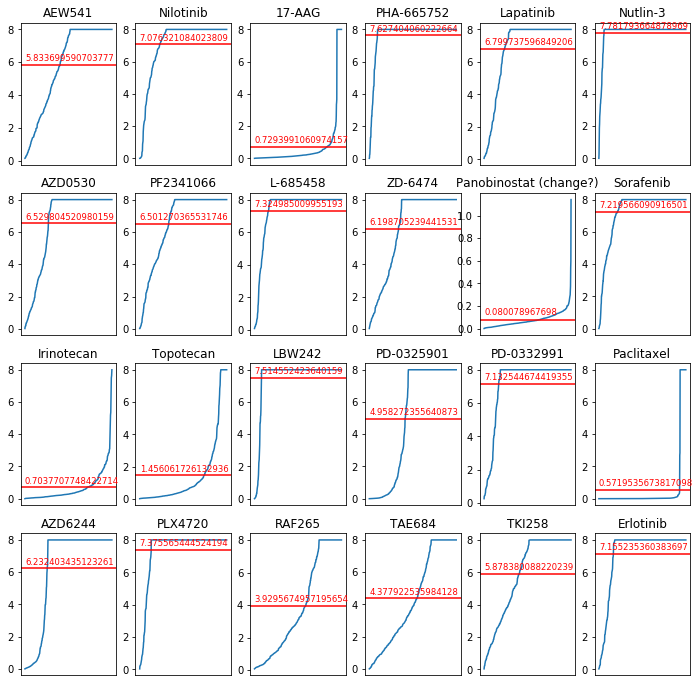

In [5]:
fig, axes = plt.subplots(4, 6, figsize=(12, 12))
fig.set_facecolor("w")
axes[0, 0].plot(AEW541['CCLE Cell Line Name'], AEW541['IC50 (uM)'])
axes[0, 0].axhline(y=AEW541['IC50 (uM)'].mean(), color='r')
axes[0, 0].text(0, AEW541['IC50 (uM)'].mean() + 0.25, str(AEW541['IC50 (uM)'].mean()), color='r', fontsize=8.5)
axes[0, 0].set_title("AEW541")
axes[0, 1].plot(Nilotinib['CCLE Cell Line Name'], Nilotinib['IC50 (uM)'])
axes[0, 1].axhline(y=Nilotinib['IC50 (uM)'].mean(), color='r')
axes[0, 1].text(0, Nilotinib['IC50 (uM)'].mean() + 0.25, str(Nilotinib['IC50 (uM)'].mean()), color='r', fontsize=8.5)
axes[0, 1].set_title("Nilotinib")
axes[0, 2].plot(AAG17['CCLE Cell Line Name'], AAG17['IC50 (uM)'])
axes[0, 2].axhline(y=AAG17['IC50 (uM)'].mean(), color='r')
axes[0, 2].text(0, AAG17['IC50 (uM)'].mean() + 0.25, str(AAG17['IC50 (uM)'].mean()), color='r', fontsize=8.5)
axes[0, 2].set_title("17-AAG")
axes[0, 3].plot(PHA665752['CCLE Cell Line Name'], PHA665752['IC50 (uM)'])
axes[0, 3].axhline(y=PHA665752['IC50 (uM)'].mean(), color='r')
axes[0, 3].text(0, PHA665752['IC50 (uM)'].mean() + 0.25, str(PHA665752['IC50 (uM)'].mean()), color='r', fontsize=8.5)
axes[0, 3].set_title("PHA-665752")
axes[0, 4].plot(Lapatinib['CCLE Cell Line Name'], Lapatinib['IC50 (uM)'])
axes[0, 4].axhline(y=Lapatinib['IC50 (uM)'].mean(), color='r')
axes[0, 4].text(0, Lapatinib['IC50 (uM)'].mean() + 0.25, str(Lapatinib['IC50 (uM)'].mean()), color='r', fontsize=8.5)
axes[0, 4].set_title("Lapatinib")
axes[0, 5].plot(Nutlin3['CCLE Cell Line Name'], Nutlin3['IC50 (uM)'])
axes[0, 5].axhline(y=Nutlin3['IC50 (uM)'].mean(), color='r')
axes[0, 5].text(0, Nutlin3['IC50 (uM)'].mean() + 0.25, str(Nutlin3['IC50 (uM)'].mean()), color='r', fontsize=8.5)
axes[0, 5].set_title("Nutlin-3")

axes[1, 0].plot(AZD0530['CCLE Cell Line Name'], AZD0530['IC50 (uM)'])
axes[1, 0].axhline(y=AZD0530['IC50 (uM)'].mean(), color='r')
axes[1, 0].text(0, AZD0530['IC50 (uM)'].mean() + 0.25, str(AZD0530['IC50 (uM)'].mean()), color='r', fontsize=8.5)
axes[1, 0].set_title("AZD0530")
axes[1, 1].plot(PF2341066['CCLE Cell Line Name'], PF2341066['IC50 (uM)'])
axes[1, 1].axhline(y=PF2341066['IC50 (uM)'].mean(), color='r')
axes[1, 1].text(0, PF2341066['IC50 (uM)'].mean() + 0.25, str(PF2341066['IC50 (uM)'].mean()), color='r', fontsize=8.5)
axes[1, 1].set_title("PF2341066")
axes[1, 2].plot(L685458['CCLE Cell Line Name'], L685458['IC50 (uM)'])
axes[1, 2].axhline(y=L685458['IC50 (uM)'].mean(), color='r')
axes[1, 2].text(0, L685458['IC50 (uM)'].mean() + 0.25, str(L685458['IC50 (uM)'].mean()), color='r', fontsize=8.5)
axes[1, 2].set_title("L-685458")
axes[1, 3].plot(ZD6474['CCLE Cell Line Name'], ZD6474['IC50 (uM)'])
axes[1, 3].axhline(y=ZD6474['IC50 (uM)'].mean(), color='r')
axes[1, 3].text(0, ZD6474['IC50 (uM)'].mean() + 0.25, str(ZD6474['IC50 (uM)'].mean()), color='r', fontsize=8.5)
axes[1, 3].set_title("ZD-6474")
axes[1, 4].plot(Panobinostat['CCLE Cell Line Name'], Panobinostat['IC50 (uM)'])
axes[1, 4].axhline(y=Panobinostat['IC50 (uM)'].mean(), color='r')
axes[1, 4].text(0, Panobinostat['IC50 (uM)'].mean() + 0.04, str(Panobinostat['IC50 (uM)'].mean()), color='r', fontsize=8.5)
axes[1, 4].set_title("Panobinostat (change?)")
axes[1, 5].plot(Sorafenib['CCLE Cell Line Name'], Sorafenib['IC50 (uM)'])
axes[1, 5].axhline(y=Sorafenib['IC50 (uM)'].mean(), color='r')
axes[1, 5].text(0, Sorafenib['IC50 (uM)'].mean() + 0.25, str(Sorafenib['IC50 (uM)'].mean()), color='r', fontsize=8.5)
axes[1, 5].set_title("Sorafenib")

axes[2, 0].plot(Irinotecan['CCLE Cell Line Name'], Irinotecan['IC50 (uM)'])
axes[2, 0].axhline(y=Irinotecan['IC50 (uM)'].mean(), color='r')
axes[2, 0].text(0, Irinotecan['IC50 (uM)'].mean() + 0.25, str(Irinotecan['IC50 (uM)'].mean()), color='r', fontsize=8.5)
axes[2, 0].set_title("Irinotecan")
axes[2, 1].plot(Topotecan['CCLE Cell Line Name'], Topotecan['IC50 (uM)'])
axes[2, 1].axhline(y=Topotecan['IC50 (uM)'].mean(), color='r')
axes[2, 1].text(0, Topotecan['IC50 (uM)'].mean() + 0.25, str(Topotecan['IC50 (uM)'].mean()), color='r', fontsize=8.5)
axes[2, 1].set_title("Topotecan")
axes[2, 2].plot(LBW242['CCLE Cell Line Name'], LBW242['IC50 (uM)'])
axes[2, 2].axhline(y=LBW242['IC50 (uM)'].mean(), color='r')
axes[2, 2].text(0, LBW242['IC50 (uM)'].mean() + 0.25, str(LBW242['IC50 (uM)'].mean()), color='r', fontsize=8.5)
axes[2, 2].set_title("LBW242")
axes[2, 3].plot(PD0325901['CCLE Cell Line Name'], PD0325901['IC50 (uM)'])
axes[2, 3].axhline(y=PD0325901['IC50 (uM)'].mean(), color='r')
axes[2, 3].text(0, PD0325901['IC50 (uM)'].mean() + 0.25, str(PD0325901['IC50 (uM)'].mean()), color='r', fontsize=8.5)
axes[2, 3].set_title("PD-0325901")
axes[2, 4].plot(PD0332991['CCLE Cell Line Name'], PD0332991['IC50 (uM)'])
axes[2, 4].axhline(y=PD0332991['IC50 (uM)'].mean(), color='r')
axes[2, 4].text(0, PD0332991['IC50 (uM)'].mean() + 0.25, str(PD0332991['IC50 (uM)'].mean()), color='r', fontsize=8.5)
axes[2, 4].set_title("PD-0332991")
axes[2, 5].plot(Paclitaxel['CCLE Cell Line Name'], Paclitaxel['IC50 (uM)'])
axes[2, 5].axhline(y=Paclitaxel['IC50 (uM)'].mean(), color='r')
axes[2, 5].text(0, Paclitaxel['IC50 (uM)'].mean() + 0.25, str(Paclitaxel['IC50 (uM)'].mean()), color='r', fontsize=8.5)
axes[2, 5].set_title("Paclitaxel")

axes[3, 0].plot(AZD6244['CCLE Cell Line Name'], AZD6244['IC50 (uM)'])
axes[3, 0].axhline(y=AZD6244['IC50 (uM)'].mean(), color='r')
axes[3, 0].text(0, AZD6244['IC50 (uM)'].mean() + 0.25, str(AZD6244['IC50 (uM)'].mean()), color='r', fontsize=8.5)
axes[3, 0].set_title("AZD6244")
axes[3, 1].plot(PLX4720['CCLE Cell Line Name'], PLX4720['IC50 (uM)'])
axes[3, 1].axhline(y=PLX4720['IC50 (uM)'].mean(), color='r')
axes[3, 1].text(0, PLX4720['IC50 (uM)'].mean() + 0.25, str(PLX4720['IC50 (uM)'].mean()), color='r', fontsize=8.5)
axes[3, 1].set_title("PLX4720")
axes[3, 2].plot(RAF265['CCLE Cell Line Name'], RAF265['IC50 (uM)'])
axes[3, 2].axhline(y=RAF265['IC50 (uM)'].mean(), color='r')
axes[3, 2].text(0, RAF265['IC50 (uM)'].mean() + 0.25, str(RAF265['IC50 (uM)'].mean()), color='r', fontsize=8.5)
axes[3, 2].set_title("RAF265")
axes[3, 3].plot(TAE684['CCLE Cell Line Name'], TAE684['IC50 (uM)'])
axes[3, 3].axhline(y=TAE684['IC50 (uM)'].mean(), color='r')
axes[3, 3].text(0, TAE684['IC50 (uM)'].mean() + 0.25, str(TAE684['IC50 (uM)'].mean()), color='r', fontsize=8.5)
axes[3, 3].set_title("TAE684")
axes[3, 4].plot(TKI258['CCLE Cell Line Name'], TKI258['IC50 (uM)'])
axes[3, 4].axhline(y=TKI258['IC50 (uM)'].mean(), color='r')
axes[3, 4].text(0, TKI258['IC50 (uM)'].mean() + 0.25, str(TKI258['IC50 (uM)'].mean()), color='r', fontsize=8.5)
axes[3, 4].set_title("TKI258")
axes[3, 5].plot(Erlotinib['CCLE Cell Line Name'], Erlotinib['IC50 (uM)'])
axes[3, 5].axhline(y=Erlotinib['IC50 (uM)'].mean(), color='r')
axes[3, 5].text(0, Erlotinib['IC50 (uM)'].mean() + 0.25, str(Erlotinib['IC50 (uM)'].mean()), color='r', fontsize=8.5)
axes[3, 5].set_title("Erlotinib")

plt.setp(plt.gcf().get_axes(), xticks=[])

In [6]:
validation = RPKMData.filter(['Name', 'Description'], axis=1)

bin1 = RPKMData.filter([0], axis=1)
bin2 = RPKMData.filter([0], axis=1)
bin3 = RPKMData.filter([0], axis=1)
bin4 = RPKMData.filter([0], axis=1)
bin5 = RPKMData.filter([0], axis=1)
bin6 = RPKMData.filter([0], axis=1)
bin7 = RPKMData.filter([0], axis=1)
bin8 = RPKMData.filter([0], axis=1)
bin9 = RPKMData.filter([0], axis=1)
bin10 = RPKMData.filter([0], axis=1)

print(bin1)

Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]

[56202 rows x 0 columns]


In [7]:
cellLine = RPKMData.columns.tolist()
cellLine.remove('Name')
cellLine.remove('Description')

In [8]:
len(list(drugData['CCLE Cell Line Name'].unique()))

504

In [9]:
def removeNull(a):
    result = list(filter(None, a)) 
    return result

In [10]:
uniqueCCLE = list(drugData['CCLE Cell Line Name'].unique())

for i in range(0, len(cellLine)):
    if cellLine[i] not in set(uniqueCCLE):
        cellLine[i] = None
        
cellLine = removeNull(cellLine)

In [11]:
for i in range(0, len(cellLine), 5):
    if cellLine[i] != None:
        validation.loc[:,cellLine[i]] = RPKMData.loc[:,cellLine[i]]
        cellLine[i] = None
    else:
        i -= 5
        
cellLine = removeNull(cellLine)
print(len(cellLine))

375


In [12]:
# bin1
for i in range(0, 37):
    if cellLine[i] != None:
        bin1.loc[:,cellLine[i]] = RPKMData.loc[:,cellLine[i]]
        cellLine[i] = None
    else:
        i -= 1
cellLine = removeNull(cellLine)

# bin2
for i in range(0, 37):
    if cellLine[i] != None:
        bin2.loc[:,cellLine[i]] = RPKMData.loc[:,cellLine[i]]
        cellLine[i] = None
    else:
        i -= 1
cellLine = removeNull(cellLine)
   
# bin3
for i in range(0, 37):
    if cellLine[i] != None:
        bin3.loc[:,cellLine[i]] = RPKMData.loc[:,cellLine[i]]
        cellLine[i] = None
    else:
        i -= 1
cellLine = removeNull(cellLine)

# bin4
for i in range(0, 37):
    if cellLine[i] != None:
        bin4.loc[:,cellLine[i]] = RPKMData.loc[:,cellLine[i]]
        cellLine[i] = None
    else:
        i -= 1
cellLine = removeNull(cellLine)

# bin5
for i in range(0, 37):
    if cellLine[i] != None:
        bin5.loc[:,cellLine[i]] = RPKMData.loc[:,cellLine[i]]
        cellLine[i] = None
    else:
        i -= 1
cellLine = removeNull(cellLine)

# bin6
for i in range(0, 38):
    if cellLine[i] != None:
        bin6.loc[:,cellLine[i]] = RPKMData.loc[:,cellLine[i]]
        cellLine[i] = None
    else:
        i -= 1
cellLine = removeNull(cellLine)
   
# bin7
for i in range(0, 38):
    if cellLine[i] != None:
        bin7.loc[:,cellLine[i]] = RPKMData.loc[:,cellLine[i]]
        cellLine[i] = None
    else:
        i -= 1
cellLine = removeNull(cellLine)

# bin8
for i in range(0, 38):
    if cellLine[i] != None:
        bin8.loc[:,cellLine[i]] = RPKMData.loc[:,cellLine[i]]
        cellLine[i] = None
    else:
        i -= 1
cellLine = removeNull(cellLine)
   
# bin9
for i in range(0, 38):
    if cellLine[i] != None:
        bin9.loc[:,cellLine[i]] = RPKMData.loc[:,cellLine[i]]
        cellLine[i] = None
    else:
        i -= 1
cellLine = removeNull(cellLine)

# bin10
for i in range(0, 38):
    if cellLine[i] != None:
        bin10.loc[:,cellLine[i]] = RPKMData.loc[:,cellLine[i]]
        cellLine[i] = None
    else:
        i -= 1
cellLine = removeNull(cellLine)

In [20]:
concat = [bin2, bin3, bin4, bin5, bin6, bin7, bin8, bin9, bin10]
concat
noBin1 = pd.concat(concat)

concat = [bin1, bin3, bin4, bin5, bin6, bin7, bin8, bin9, bin10]
noBin2 = pd.concat(concat)

concat = [bin1, bin2, bin4, bin5, bin6, bin7, bin8, bin9, bin10]
noBin3 = pd.concat(concat)

concat = [bin1, bin2, bin3, bin5, bin6, bin7, bin8, bin9, bin10]
noBin4 = pd.concat(concat)

concat = [bin1, bin2, bin3, bin4, bin6, bin7, bin8, bin9, bin10]
noBin5 = pd.concat(concat)

concat = [bin1, bin2, bin3, bin4, bin5, bin7, bin8, bin9, bin10]
noBin6 = pd.concat(concat)

concat = [bin1, bin2, bin3, bin4, bin5, bin6, bin8, bin9, bin10]
noBin7 = pd.concat(concat)

concat = [bin1, bin2, bin3, bin4, bin5, bin6, bin7, bin9, bin10]
noBin8 = pd.concat(concat)

concat = [bin1, bin2, bin3, bin4, bin5, bin6, bin7, bin8, bin10]
noBin9 = pd.concat(concat)

concat = [bin1, bin2, bin3, bin4, bin5, bin6, bin7, bin8, bin9]
noBin10 = pd.concat(concat)


C:\Users\Jeff\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Jeff\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  
C:\Users\Jeff\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain

In [24]:
bin2

CHP212_AUTONOMIC_GANGLIA  CI1_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE  \
0                      0.034090                                0.044581   
1                      4.144180                                5.002310   
2                      0.018932                                0.024757   
3                      0.000000                                0.015598   
4                      0.015353                                0.006693   
...                         ...                                     ...   
56197               1583.730000                             2411.640000   
56198                  2.317900                                3.766020   
56199               3161.050000                             4036.830000   
56200                  0.330444                                1.152350   
56201                  0.320725                                1.398070   

       COLO201_LARGE_INTESTINE  COLO678_LARGE_INTESTINE  COLO679_SKIN  \
0                     0.037832                 0.076210      0.028709   
1                     9.881730                 8.242330      5.178440   
2                     0.056025                 0.008910      0.045552   
3                     0.035297                 0.022454      0.028699   
4                     0.000000                 0.021677      0.022165   
...                        ...                      ...           ...   
56197              2357.330000              2004.740000    697.244000   
56198                 3.533660                 2.280940      1.318240   
56199              3444.530000              5710.500000   4169.450000   
56200                 0.217310                 0.622076      0.318038   
56201                 1.054590                 0.603779      0.514472   

       COLO741_SKIN  CORL105_LUNG  COV318_OVARY  DAOY_CENTRAL_NERVOUS_SYSTEM  \
0          0.023402      0.079364      0.095808                     0.027792   
1          7.051110      3.698490      3.698350                     4.165430   
2          0.041588      0.044074      0.074488                     0.051447   
3          0.006550      0.044428      0.060338                     0.019448   
4          0.025296      0.028594      0.017260                     0.016689   
...             ...           ...           ...                          ...   
56197   1507.310000   2806.790000  11904.100000                  1494.630000   
56198      1.735860      4.218820     13.857500                     2.634090   
56199   6251.500000   6044.090000  12451.100000                  2539.380000   
56200      0.362952      1.333430      2.971780                     0.119731   
56201      0.352277      1.493320      4.086190                     0.232420   

       DBTRG05MG_CENTRAL_NERVOUS_SYSTEM  ...  G401_SOFT_TISSUE  \
0                              0.062215  ...          0.028730   
1                              4.224230  ...          4.721370   
2                              0.030711  ...          0.031910   
3                              0.058047  ...          0.013403   
4                              0.062266  ...          0.017252   
...                                 ...  ...               ...   
56197                       2810.470000  ...        876.768000   
56198                          5.127480  ...          1.894250   
56199                       3515.280000  ...       1889.890000   
56200                          0.357370  ...          0.247544   
56201                          0.867147  ...          0.840920   

       G402_SOFT_TISSUE  GAMG_CENTRAL_NERVOUS_SYSTEM  \
0              0.043082                     0.063869   
1              3.423900                     4.186060   
2              0.069601                     0.023646   
3              0.060294                     0.059590   
4              0.014111                     0.009588   
...                 ...                          ...   
56197       2604.290000                   976.202000   
56198          4.454460    

In [25]:
noBin1

CHP212_AUTONOMIC_GANGLIA  CI1_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE  \
0                      0.034090                                0.044581   
1                      4.144180                                5.002310   
2                      0.018932                                0.024757   
3                      0.000000                                0.015598   
4                      0.015353                                0.006693   
...                         ...                                     ...   
56197                       NaN                                     NaN   
56198                       NaN                                     NaN   
56199                       NaN                                     NaN   
56200                       NaN                                     NaN   
56201                       NaN                                     NaN   

       COLO201_LARGE_INTESTINE  COLO678_LARGE_INTESTINE  COLO679_SKIN  \
0                     0.037832                 0.076210      0.028709   
1                     9.881730                 8.242330      5.178440   
2                     0.056025                 0.008910      0.045552   
3                     0.035297                 0.022454      0.028699   
4                     0.000000                 0.021677      0.022165   
...                        ...                      ...           ...   
56197                      NaN                      NaN           NaN   
56198                      NaN                      NaN           NaN   
56199                      NaN                      NaN           NaN   
56200                      NaN                      NaN           NaN   
56201                      NaN                      NaN           NaN   

       COLO741_SKIN  CORL105_LUNG  COV318_OVARY  DAOY_CENTRAL_NERVOUS_SYSTEM  \
0          0.023402      0.079364      0.095808                     0.027792   
1          7.051110      3.698490      3.698350                     4.165430   
2          0.041588      0.044074      0.074488                     0.051447   
3          0.006550      0.044428      0.060338                     0.019448   
4          0.025296      0.028594      0.017260                     0.016689   
...             ...           ...           ...                          ...   
56197           NaN           NaN           NaN                          NaN   
56198           NaN           NaN           NaN                          NaN   
56199           NaN           NaN           NaN                          NaN   
56200           NaN           NaN           NaN                          NaN   
56201           NaN           NaN           NaN                          NaN   

       DBTRG05MG_CENTRAL_NERVOUS_SYSTEM  ...  UMUC3_URINARY_TRACT  \
0                              0.062215  ...                  NaN   
1                              4.224230  ...                  NaN   
2                              0.030711  ...                  NaN   
3                              0.058047  ...                  NaN   
4                              0.062266  ...                  NaN   
...                                 ...  ...                  ...   
56197                               NaN  ...          2294.150000   
56198                               NaN  ...             3.066670   
56199                               NaN  ...          1985.490000   
56200                               NaN  ...             0.427475   
56201                               NaN  ...             0.103726   

       VMRCRCW_KIDNEY  VMRCRCZ_KIDNEY  WM1799_SKIN  WM2664_SKIN   WM793_SKIN  \
0                 NaN             NaN          NaN          NaN          NaN   
1                 NaN             NaN          NaN          NaN          NaN   
2                 NaN             NaN          NaN          NaN          NaN   
3                 NaN             NaN          NaN          NaN          NaN   
4                 NaN             NaN  

In [26]:
RPKMData

Name Description  22RV1_PROSTATE  2313287_STOMACH  \
0      ENSG00000223972.4     DDX11L1        0.053448         0.043078   
1      ENSG00000227232.4      WASH7P        5.752560         4.261040   
2      ENSG00000243485.2  MIR1302-11        0.039576         0.011961   
3      ENSG00000237613.2     FAM138A        0.037400         0.022608   
4      ENSG00000268020.2      OR4G4P        0.000000         0.019401   
...                  ...         ...             ...              ...   
56197  ENSG00000198695.2      MT-ND6     1794.950000      1974.760000   
56198  ENSG00000210194.1       MT-TE        4.625190         3.062130   
56199  ENSG00000198727.2      MT-CYB     4630.210000      3685.240000   
56200  ENSG00000210195.2       MT-TT        0.230258         0.000000   
56201  ENSG00000210196.2       MT-TP        0.446972         0.270188   

       253JBV_URINARY_TRACT  253J_URINARY_TRACT  \
0                  0.037956            0.028313   
1                  3.100480            3.079090   
2                  0.031618            0.031446   
3                  0.013280            0.026416   
4                  0.025642            0.008501   
...                     ...                 ...   
56197           2097.980000         3909.720000   
56198              1.290380            3.850100   
56199           1778.510000         4159.000000   
56200              0.613195            0.853810   
56201              1.309350            2.486090   

       42MGBA_CENTRAL_NERVOUS_SYSTEM  5637_URINARY_TRACT    59M_OVARY  \
0                           0.009377            0.004012     0.017452   
1                           3.994940            3.356750     2.569410   
2                           0.020831            0.053476     0.029075   
3                           0.006562            0.022461     0.018318   
4                           0.008447            0.000000     0.007860   
...                              ...                 ...          ...   
56197                    1622.680000         1201.490000  1900.100000   
56198                       2.550380            2.876880    37.648000   
56199                    2215.690000         1932.630000  1975.030000   
56200                       0.121196            0.207424     0.676664   
56201                       0.117631            0.201323     1.313520   

       639V_URINARY_TRACT  ...  WSUDLCL2_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE  \
0                0.013608  ...                                     0.180119   
1                3.025490  ...                                     5.420360   
2                0.040305  ...                                     0.244510   
3                0.006348  ...                                     0.196060   
4                0.016343  ...                                     0.144213   
...                   ...  ...                                          ...   
56197         1426.190000  ...                                  2113.220000   
56198            2.579540  ...                                     3.216320   
56199         1573.770000  ...                                  1361.440000   
56200            0.234503  ...                                     1.551930   
56201            0.682819  ...                                     1.506290   

       YAPC_PANCREAS  YD10B_UPPER_AERODIGESTIVE_TRACT  YD15_SALIVARY_GLAND  \
0           0.102898                         0.354700             0.418945   
1           2.323580                         5.666570             2.795510   
2           0.114286                         0.472748             0.572692   
3           0.164578                         0.384714             0.285641   
4           0.039722                         0.239619             0.135462   
...              ...                              ...                  ...   
56197    1320.950000                      4827.860000          5515.710000   
56198       1.090330                         4.384910            14.873400   
56